TEST

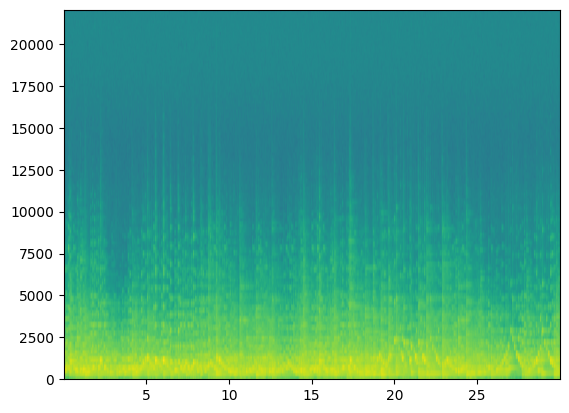

In [1]:
import librosa
import pylab
import numpy as np

SAMPLE_RATE = 44100
wav_file = "../data/60_sec.wav"

class Loader:
    """Loader is responsible for loading an audio file."""

    def __init__(self, sample_rate, duration, mono):
        self.sample_rate = sample_rate
        self.duration = duration
        self.mono = mono

    def load(self, file_path):
        signal = librosa.load(file_path,
                              sr=self.sample_rate,
                              duration=self.duration,
                              mono=self.mono)[0]
        return signal

class Padder:
    """Padder is responsible to apply padding to an array."""

    def __init__(self, mode="constant"):
        self.mode = mode

    def left_pad(self, array, num_missing_items):
        padded_array = np.pad(array,
                              (num_missing_items, 0),
                              mode=self.mode)
        return padded_array

    def right_pad(self, array, num_missing_items):
        padded_array = np.pad(array,
                              (0, num_missing_items),
                              mode=self.mode)
        return padded_array

class LogSpectrogramExtractor:
    """LogSpectrogramExtractor extracts log spectrograms (in dB) from a
    time-series signal.
    """

    def __init__(self, frame_size, hop_length):
        self.frame_size = frame_size
        self.hop_length = hop_length

    def extract(self, signal):
        stft = librosa.stft(signal,
                            n_fft=self.frame_size,
                            hop_length=self.hop_length)[:-1]
        spectrogram = np.abs(stft)
        log_spectrogram = librosa.amplitude_to_db(spectrogram)
        return log_spectrogram

signal = librosa.load(wav_file,
                    sr=SAMPLE_RATE,
                    duration=30,
                    mono=True)[0]

pylab.specgram(signal, Fs=SAMPLE_RATE)
pylab.savefig('../data/spectrogram/60_sec.png')


#def graph_spectrogram_wave(wav_file):
#    import wave
#    import pylab
#    def get_wav_info(wav_file):
#        wav = wave.open(wav_file, 'r')
#        frames = wav.readframes(-1)
#        sound_info = pylab.fromstring(frames, 'int16')
#        frame_rate = wav.getframerate()
#       wav.close()
#        return sound_info, frame_rate
#    sound_info, frame_rate = get_wav_info(wav_file)
#    pylab.figure(num=3, figsize=(10, 6))
#   pylab.title('spectrogram pylab with wav_file')
#    pylab.specgram(sound_info, Fs=frame_rate)
#    pylab.savefig('spectrogram2.png')


#def graph_wavfileread(_wav_file_):
#    import matplotlib.pyplot as plt
#    from scipy import signal
#   from scipy.io import wavfile
#   import numpy as np   
#    sample_rate, samples = wavfile.read(_wav_file_)   
#    frequencies, times, spectrogram = signal.spectrogram(samples,sample_rate,nfft=1024)
#    plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
#    plt.ylabel('Frequency [Hz]')
#    plt.xlabel('Time [sec]')
#    plt.savefig("spectogram1.png")
    